In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import databaseconfig as cfg
import sqlalchemy as db
import psycopg2
import statsmodels.api as sm
import statsmodels.graphics.api as smg

In [3]:
# Connect to database
engine = db.create_engine(f"postgresql+psycopg2://{cfg.user}:{cfg.password}@{cfg.host}:{cfg.port}/{cfg.database}")
metadata = db.MetaData()
connection = engine.connect()

In [4]:
# Read data
installations = db.Table('combined_data',metadata,autoload=True,autoload_with=engine)
installation_results = connection.execute(db.select([installations])).fetchall()
installations_df= pd.DataFrame(installation_results)
installations_df.columns = installation_results[0].keys()
installations_df=installations_df.sort_values('installation_date')

In [8]:
n_samples = len(installations_df)
print(n_samples)
print(installations_df.columns)
installations_df.describe()

115851
Index(['system_id', 'data_provider', 'provider', 'installation_date',
       'install_yr', 'system_size', 'system_inverter_capacity',
       'total_installed_price', 'appraised_value_flag', 'rebate_or_grant',
       'performance_based_incentive_annual',
       'performance_based_incentive_duration',
       'performance_based_incentive_total', 'discounts',
       'cost_after_discounts', 'customer_segment', 'customer_group',
       'new_construction', 'city', 'zip_code', 'zip_code_extension', 'income',
       'population', 'state', 'latitude', 'longitude', 'temperature',
       'utility_service_territory', 'third_party_owned', 'installer',
       'self_installed', 'module_manufacturers', 'module_manufacturer_1',
       'module_1_count', 'module_mfg_1', 'module_country_1', 'module_region_1',
       'module_model_1', 'module_efficiency_1', 'module_technology_1',
       'module_manufacturer_2', 'module_2_count', 'module_mfg_2',
       'module_country_2', 'module_region_2', 'module_mo

,data_provider,install_yr,system_size,system_inverter_capacity,total_installed_price,appraised_value_flag,rebate_or_grant,performance_based_incentive_annual,performance_based_incentive_duration,performance_based_incentive_total,...,microinverter_count,dc_optimizer,dc_optimizer_count,log_population,residential,non_residential,america,china,asia,north_america
count,115851.000000,115851.000000,115851.000000,87178.000000,1.158510e+05,115851.000000,1.088900e+05,115851.000000,115851.000000,1.158510e+05,...,115851.000000,115851.000000,115851.000000,59825.000000,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000
mean,4.159861,2014.878370,10.520833,9.666033,9.527383e+04,0.343105,3.067490e+03,335.769148,0.122744,6.715383e+03,...,0.065153,0.187422,0.187422,5.187828,0.971144,0.021113,0.061476,0.311253,0.513936,0.098342
std,3.912243,2.799746,43.238609,40.286089,1.418975e+07,0.474748,1.853856e+04,7638.493153,1.561996,1.527699e+05,...,0.246796,0.390251,0.390251,0.650046,0.167403,0.143763,0.240202,0.463008,0.499808,0.297778
min,1.000000,1999.000000,0.120000,0.175000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,2.540329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2013.000000,5.200000,5.000000,2.098800e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,4.835392,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2016.000000,7.200000,6.500000,2.915560e+04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,5.140385,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.000000,2017.000000,9.625000,8.000000,3.997100e+04,1.000000,1.503000e+03,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,5.410212,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,11.000000,2018.000000,3903.070000,3750.000000,4.806580e+09,1.000000,2.187000e+06,976135.000000,20.000000,1.952270e+07,...,1.000000,1.000000,1.000000,6.220179,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
installations_df.head()

,system_id,data_provider,provider,installation_date,install_yr,system_size,system_inverter_capacity,total_installed_price,appraised_value_flag,rebate_or_grant,...,microinverter_count,dc_optimizer,dc_optimizer_count,log_population,residential,non_residential,america,china,asia,north_america
87567,AZ_H1DQUEOmLS,10,Tucson Electric Power,1999-09-09,1999,9.500,NaN,54340.0,1,NaN,...,0,0,0,NaN,1,0,0,0,0,0
84241,AZ_dZ0CK8ChgY,10,Tucson Electric Power,1999-09-09,1999,2.550,NaN,11220.0,1,NaN,...,0,0,0,NaN,1,0,0,0,0,0
78104,AZ_6ol4VuhgDK,10,Tucson Electric Power,1999-09-09,1999,1.960,NaN,8991.0,0,NaN,...,0,0,0,NaN,1,0,0,0,0,0
78089,AZ_6nWdha3YOg,10,Tucson Electric Power,1999-09-09,1999,3.060,NaN,12072.0,0,NaN,...,0,0,0,NaN,1,0,0,0,0,0
104491,AZ_VZ0pA1NdIE,10,Tucson Electric Power,1999-09-09,1999,7.755,NaN,38775.0,0,775.5,...,0,0,0,NaN,1,0,0,0,0,0


In [ ]:
variables = [
    "total_installed_price",
    "install_yr",
    "system_size",
    "residential",
    "non_residential",
    "america",
    "china",
    "asia",
    "north_america",
    "inverter_loading_ratio",
    "discounts",
    "temperature",
    "income",
    "log_population",
    "module_efficiency_1"
]

In [46]:
variables_df = installations_df[variables]
variables_df.describe()

,total_installed_price,install_yr,system_size,residential,non_residential,america,china,asia,north_america,inverter_loading_ratio,discounts,temperature,income,log_population,module_efficiency_1
count,1.158510e+05,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000,115851.000000,87178.000000,1.088900e+05,87187.000000,45530.000000,59825.000000,71469.000000
mean,9.527383e+04,2014.878370,10.520833,0.971144,0.021113,0.061476,0.311253,0.513936,0.098342,1.140644,1.021217e+04,96.246052,63157.199099,5.187828,0.166430
std,1.418975e+07,2.799746,43.238609,0.167403,0.143763,0.240202,0.463008,0.499808,0.297778,1.148254,1.585162e+05,5.256246,13364.155589,0.650046,0.020236
min,1.000000e+00,1999.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030714,0.000000e+00,65.000000,41037.000000,2.540329,-0.000018
25%,2.098800e+04,2013.000000,5.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.035000,0.000000e+00,96.000000,52062.000000,4.835392,0.153374
50%,2.915560e+04,2016.000000,7.200000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.125000,0.000000e+00,97.000000,58247.000000,5.140385,0.167665
75%,3.997100e+04,2017.000000,9.625000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.200000,1.728000e+03,98.500000,72142.000000,5.410212,0.181847
max,4.806580e+09,2018.000000,3903.070000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.500000,1.952270e+07,101.000000,99866.000000,6.220179,0.226994


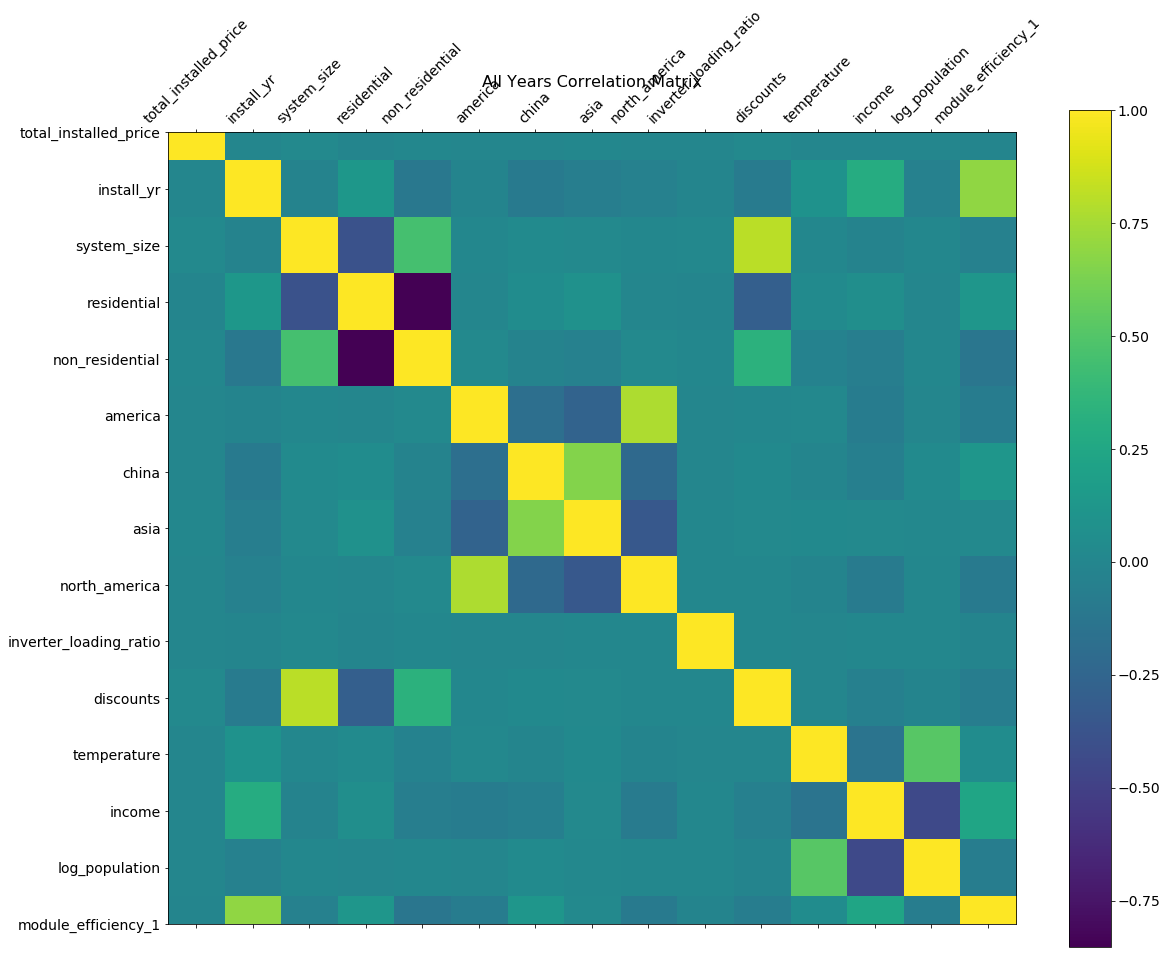

In [48]:
f = plt.figure(figsize=(19, 15))
plt.matshow(variables_df.corr(), fignum=f.number)
plt.xticks(range(variables_df.shape[1]), variables_df.columns, fontsize=14, rotation=45)
plt.yticks(range(variables_df.shape[1]), variables_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('All Years Correlation Matrix', fontsize=16);

In [13]:
df_all_cleaned = installations_df[variables].dropna()
df_all_cleaned.describe()

,total_installed_price,install_yr,system_size,residential,non_residential,america,china,asia,north_america,inverter_loading_ratio,discounts,temperature,income,log_population,module_efficiency_1
count,3.828200e+04,38282.000000,38282.000000,38282.000000,38282.000000,38282.000000,38282.000000,38282.000000,38282.000000,38282.000000,3.828200e+04,38282.000000,38282.000000,38282.000000,38282.000000
mean,4.131522e+04,2016.149444,10.377104,0.990518,0.009482,0.084008,0.415104,0.652291,0.142626,1.143706,3.300926e+03,97.940520,63190.684186,5.457287,0.171625
std,1.453532e+05,1.694705,29.938779,0.096915,0.096915,0.277404,0.492746,0.476249,0.349695,0.701556,5.891965e+04,2.902883,13508.689463,0.492173,0.017652
min,1.000000e+00,2013.000000,0.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043333,0.000000e+00,70.500000,41037.000000,4.835392,-0.000018
25%,2.100000e+04,2015.000000,5.880000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,0.000000e+00,97.000000,52062.000000,5.091829,0.157407
50%,2.891050e+04,2017.000000,7.950000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.145450,0.000000e+00,97.000000,58247.000000,5.378901,0.168570
75%,3.950000e+04,2017.000000,10.360000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.216130,0.000000e+00,101.000000,72142.000000,6.179944,0.182752
max,5.932000e+06,2018.000000,1395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.500000,2.443875e+06,101.000000,99866.000000,6.220179,0.226994


In [14]:
df_all_cleaned.head()

,total_installed_price,install_yr,system_size,residential,non_residential,america,china,asia,north_america,inverter_loading_ratio,discounts,temperature,income,log_population,module_efficiency_1
51489,34626.0,2013,6.96,1,0,0,1,1,0,1.16,1392.0,97.0,55857.0,5.091829,0.146341
83127,22486.0,2013,6.72,1,0,0,0,1,0,1.12,3360.0,97.0,55857.0,5.091829,0.146341
18160,69252.0,2013,13.92,1,0,0,1,1,0,1.16,2784.0,97.5,44545.0,4.963424,0.146341
16065,33432.0,2013,6.72,1,0,0,1,1,0,1.12,1344.0,97.0,55857.0,5.091829,0.146341
53898,31872.0,2013,9.60,1,0,1,0,0,1,1.00,1920.0,97.0,55857.0,5.091829,0.149068


In [30]:
y = df_all_cleaned["total_installed_price"]
print(y.shape)
y.head()

(38282,)


51489    34626.0
83127    22486.0
18160    69252.0
16065    33432.0
53898    31872.0
Name: total_installed_price, dtype: float64

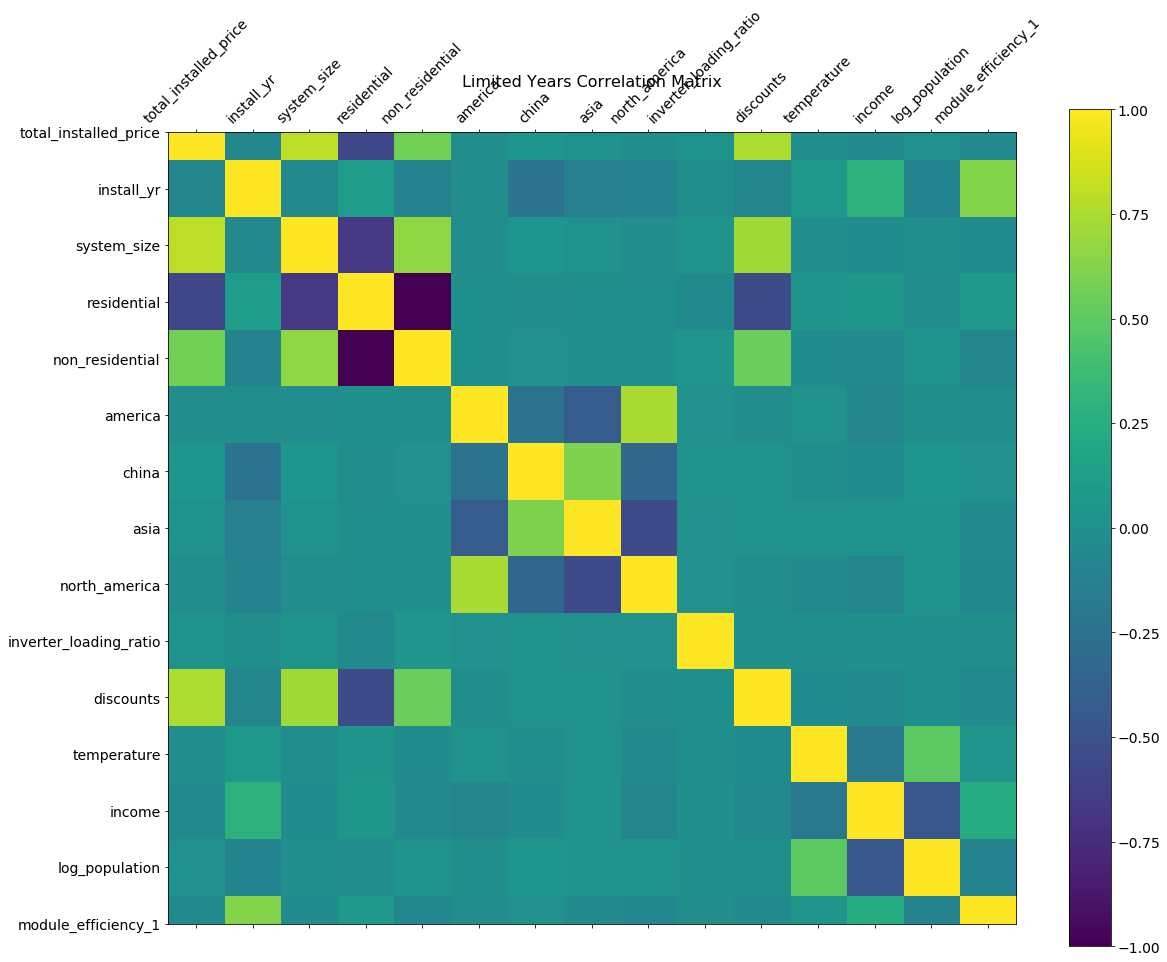

In [47]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_all_cleaned.corr(), fignum=f.number)
plt.xticks(range(df_all_cleaned.shape[1]), df_all_cleaned.columns, fontsize=14, rotation=45)
plt.yticks(range(df_all_cleaned.shape[1]), df_all_cleaned.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Limited Years Correlation Matrix', fontsize=16);

In [16]:
predictors = ["install_yr",
              "system_size",
              "residential",
              "asia",
              "north_america",
              "inverter_loading_ratio",
              "discounts",
              "temperature",
              "income",
              "log_population",
              "module_efficiency_1"
             ]
predictors_df = df_all_cleaned[predictors]
print(predictors_df.shape)
predictors_df.head()

(38282, 11)


,install_yr,system_size,residential,asia,north_america,inverter_loading_ratio,discounts,temperature,income,log_population,module_efficiency_1
51489,2013,6.96,1,1,0,1.16,1392.0,97.0,55857.0,5.091829,0.146341
83127,2013,6.72,1,1,0,1.12,3360.0,97.0,55857.0,5.091829,0.146341
18160,2013,13.92,1,1,0,1.16,2784.0,97.5,44545.0,4.963424,0.146341
16065,2013,6.72,1,1,0,1.12,1344.0,97.0,55857.0,5.091829,0.146341
53898,2013,9.60,1,0,1,1.00,1920.0,97.0,55857.0,5.091829,0.149068


In [17]:
model = sm.OLS(y, predictors_df).fit()
predictions = model.predict(predictors_df)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.731
Model:                               OLS   Adj. R-squared (uncentered):              0.731
Method:                    Least Squares   F-statistic:                              9467.
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                           11:24:56   Log-Likelihood:                     -4.8571e+05
No. Observations:                  38282   AIC:                                  9.714e+05
Df Residuals:                      38271   BIC:                                  9.715e+05
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
install_yr                24.9157      7.718      3.228      0.001       9.788      40.043
system_size             2497.2097     21.824    114.427      0.000    2454.435    2539.985
residential            -2.653e+04   5646.285     -4.698      0.000   -3.76e+04   -1.55e+04
asia                     638.7875   1020.377      0.626      0.531   -1361.178    2638.753
north_america            689.7983   1394.940      0.495      0.621   -2044.321    3423.917
inverter_loading_ratio    40.1008    571.974      0.070      0.944   -1080.983    1161.184
discounts                  0.9392      0.010     96.148      0.000       0.920       0.958
temperature              -80.5660    160.442     -0.502      0.616    -395.036     233.904
income                    -0.0494      0.034     -1.444      0.149      -0.116       0.018
log_population          2704.2373   1033.046      2.618      0.009     679.441    4729.034
module_efficiency_1    -9.302e+04   2.37e+04     -3.923      0.000   -1.39e+05   -4.66e+04
==============================================================================
Omnibus:                    98548.147   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3612336837.199
Skew:                          29.217   Prob(JB):                         0.00
Kurtosis:                    1506.747   Cond. No.                     3.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
residential_df = df_all_cleaned.loc[df_all_cleaned["residential"] == 1]
residential_df.drop(columns=["residential","non_residential"],inplace=True)
y = residential_df["total_installed_price"]
X = residential_df[[
    "install_yr",
    "system_size",
    "asia",
    "inverter_loading_ratio",
    "discounts",
    "temperature",
    "income",
    "log_population",
    "module_efficiency_1"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.220
Model:                               OLS   Adj. R-squared (uncentered):              0.220
Method:                    Least Squares   F-statistic:                              1189.
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                           12:48:39   Log-Likelihood:                     -4.7517e+05
No. Observations:                  37919   AIC:                                  9.504e+05
Df Residuals:                      37910   BIC:                                  9.504e+05
Df Model:                              9                                                  
Covariance Type:               nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
install_yr                 2.4640      6.353      0.388      0.698      -9.989      14.917
system_size             3467.9456     96.047     36.107      0.000    3279.691    3656.200
asia                    -599.9620    728.380     -0.824      0.410   -2027.606     827.682
inverter_loading_ratio   224.5234    907.518      0.247      0.805   -1554.236    2003.283
discounts                  0.9567      0.625      1.530      0.126      -0.269       2.182
temperature             -162.7513    139.161     -1.170      0.242    -435.511     110.008
income                     0.0191      0.029      0.650      0.516      -0.039       0.077
log_population          5710.6435    887.588      6.434      0.000    3970.947    7450.340
module_efficiency_1    -1.013e+05   2.11e+04     -4.806      0.000   -1.43e+05      -6e+04
==============================================================================
Omnibus:                   116162.105   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11579066524.815
Skew:                          46.633   Prob(JB):                         0.00
Kurtosis:                    2708.553   Cond. No.                     3.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
residential_df_min = df_all_cleaned.loc[df_all_cleaned["residential"] == 1]
residential_df_min.drop(columns=["residential","non_residential"],inplace=True)
y = residential_df_min["total_installed_price"]
X = residential_df_min[[
    "system_size",
    "log_population",
    "module_efficiency_1"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.220
Model:                               OLS   Adj. R-squared (uncentered):              0.220
Method:                    Least Squares   F-statistic:                              3567.
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                           11:25:04   Log-Likelihood:                     -4.7518e+05
No. Observations:                  37919   AIC:                                  9.504e+05
Df Residuals:                      37916   BIC:                                  9.504e+05
Df Model:                              3                                                  
Covariance Type:               nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
system_size          3472.5566     94.756     36.648      0.000    3286.833    3658.280
log_population       4530.6382    440.071     10.295      0.000    3668.087    5393.189
module_efficiency_1 -1.205e+05   1.44e+04     -8.373      0.000   -1.49e+05   -9.23e+04
==============================================================================
Omnibus:                   116166.510   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      11580193774.825
Skew:                          46.638   Prob(JB):                         0.00
Kurtosis:                    2708.685   Cond. No.                         440.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
nonresidential_df = df_all_cleaned.loc[df_all_cleaned["non_residential"] == 1]
nonresidential_df.drop(columns=["residential","non_residential"],inplace=True)
y = nonresidential_df["total_installed_price"]
X = nonresidential_df[[
    "install_yr",
    "system_size",
    "asia",
    "discounts",
    "temperature",
    "income",
    "log_population",
    "module_efficiency_1"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.915
Model:                               OLS   Adj. R-squared (uncentered):              0.913
Method:                    Least Squares   F-statistic:                              479.6
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                   3.65e-185
Time:                           21:18:19   Log-Likelihood:                         -5189.4
No. Observations:                    363   AIC:                                  1.039e+04
Df Residuals:                        355   BIC:                                  1.043e+04
Df Model:                              8                                                  
Covariance Type:               nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
install_yr            826.7592    235.866      3.505      0.001     362.888    1290.630
system_size          2573.2687    116.828     22.026      0.000    2343.507    2803.031
asia                 2.182e+04   4.74e+04      0.460      0.646   -7.14e+04    1.15e+05
discounts               0.8041      0.054     14.882      0.000       0.698       0.910
temperature          1.202e+04   5015.173      2.396      0.017    2153.907    2.19e+04
income                 -9.4469      1.958     -4.826      0.000     -13.297      -5.597
log_population      -3.555e+05   6.07e+04     -5.853      0.000   -4.75e+05   -2.36e+05
module_efficiency_1 -1.817e+06   1.53e+06     -1.187      0.236   -4.83e+06    1.19e+06
==============================================================================
Omnibus:                       35.720   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.636
Skew:                          -0.012   Prob(JB):                     1.09e-41
Kurtosis:                       6.531   Cond. No.                     4.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
nonresidential_df_min = df_all_cleaned.loc[df_all_cleaned["non_residential"] == 1]
nonresidential_df_min.drop(columns=["residential","non_residential"],inplace=True)
y = nonresidential_df_min["total_installed_price"]
X = nonresidential_df_min[[
    "install_yr",
    "system_size",
    "discounts",
    "temperature",
    "log_population"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.909
Model:                               OLS   Adj. R-squared (uncentered):              0.908
Method:                    Least Squares   F-statistic:                              715.6
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                   6.74e-184
Time:                           21:26:08   Log-Likelihood:                         -5202.4
No. Observations:                    363   AIC:                                  1.041e+04
Df Residuals:                        358   BIC:                                  1.043e+04
Df Model:                              5                                                  
Covariance Type:               nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
install_yr       292.6795    203.760      1.436      0.152    -108.037     693.396
system_size     2441.1367    115.937     21.056      0.000    2213.134    2669.140
discounts          0.8970      0.052     17.211      0.000       0.794       0.999
temperature     1.214e+04   5112.052      2.375      0.018    2086.529    2.22e+04
log_population -3.065e+05   5.95e+04     -5.149      0.000   -4.24e+05   -1.89e+05
==============================================================================
Omnibus:                       45.011   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.867
Skew:                           0.125   Prob(JB):                     5.17e-68
Kurtosis:                       7.519   Cond. No.                     1.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
nonresidential_df_min = df_all_cleaned.loc[df_all_cleaned["non_residential"] == 1]
nonresidential_df_min.drop(columns=["residential","non_residential"],inplace=True)
y = nonresidential_df_min["total_installed_price"]
X = nonresidential_df_min[[
    "system_size",
    "discounts",
    "temperature",
    "log_population"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.909
Model:                               OLS   Adj. R-squared (uncentered):              0.908
Method:                    Least Squares   F-statistic:                              891.3
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                   5.92e-185
Time:                           22:31:39   Log-Likelihood:                         -5203.4
No. Observations:                    363   AIC:                                  1.041e+04
Df Residuals:                        359   BIC:                                  1.043e+04
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
system_size     2441.7160    116.108     21.030      0.000    2213.379    2670.053
discounts          0.9025      0.052     17.338      0.000       0.800       1.005
temperature     1.758e+04   3436.903      5.116      0.000    1.08e+04    2.43e+04
log_population  -2.96e+05   5.92e+04     -5.003      0.000   -4.12e+05    -1.8e+05
==============================================================================
Omnibus:                       44.474   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.116
Skew:                           0.123   Prob(JB):                     4.11e-66
Kurtosis:                       7.455   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
nonresidential_df_min = df_all_cleaned.loc[df_all_cleaned["non_residential"] == 1]
nonresidential_df_min.drop(columns=["residential","non_residential"],inplace=True)
y = nonresidential_df_min["total_installed_price"]
X = nonresidential_df_min[[
    "install_yr",
    "system_size",
    "discounts",
    "income"
]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     total_installed_price   R-squared (uncentered):                   0.905
Model:                               OLS   Adj. R-squared (uncentered):              0.904
Method:                    Least Squares   F-statistic:                              856.9
Date:                   Wed, 12 Feb 2020   Prob (F-statistic):                   3.58e-182
Time:                           12:45:52   Log-Likelihood:                         -5209.9
No. Observations:                    363   AIC:                                  1.043e+04
Df Residuals:                        359   BIC:                                  1.044e+04
Df Model:                              4                                                  
Covariance Type:               nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
install_yr    203.1492     55.501      3.660      0.000      94.002     312.297
system_size  2540.9618    120.717     21.049      0.000    2303.560    2778.364
discounts       0.9024      0.054     16.727      0.000       0.796       1.009
income         -6.6899      1.981     -3.377      0.001     -10.586      -2.794
==============================================================================
Omnibus:                       44.876   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.587
Skew:                           0.163   Prob(JB):                     3.95e-65
Kurtosis:                       7.416   Cond. No.                     3.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
trends = db.Table('trends',metadata,autoload=True,autoload_with=engine)
trends_results = connection.execute(db.select([trends])).fetchall()
trends_df= pd.DataFrame(trends_results)
trends_df.columns = trends_results[0].keys()
trends_df=trends_df.sort_values('install_yr')
trends_df.head()

,install_yr,customer_group,avg_price_k,med_price_1k,sum_price_1k,installations,avg_discounts_1k,med_discounts_1k,sum_discounts_1k,avg_income_1k,avg_population,avg_log_population,avg_temperature,avg_module_1_efficiency,avg_ilr,avg_system_size,pct_american,pct_chinese,pct_north_american,pct_asian
0,1999,Residential,23.577306,16.200000,1485.370258,63,0.233758,0.1750,3.03885,None,None,NaN,NaN,NaN,NaN,5.549778,0E-20,0E-20,0E-20,0E-20
1,2000,Residential,43.801412,31.244000,744.624000,17,0.636688,0.5886,10.82370,None,None,NaN,NaN,NaN,NaN,6.366882,0E-20,0E-20,0E-20,0E-20
2,2001,Residential,39.500000,39.500000,39.500000,1,0.000000,0.0000,0.00000,None,None,NaN,NaN,NaN,NaN,10.464000,0E-20,0E-20,0E-20,0E-20
3,2002,Residential,18.197058,17.046000,72.788230,4,4.040000,4.3200,16.16000,None,None,NaN,86.500000,NaN,0.464773,2.020000,0E-20,0E-20,0E-20,0E-20
4,2003,Non-Residential,26.913197,28.438391,80.739590,3,7.615833,7.1275,22.84750,None,None,NaN,82.166667,NaN,1.052000,2.533333,0E-20,0E-20,0E-20,0E-20


In [23]:
trends_df

,install_yr,customer_group,avg_price_k,med_price_1k,sum_price_1k,installations,avg_discounts_1k,med_discounts_1k,sum_discounts_1k,avg_income_1k,avg_population,avg_log_population,avg_temperature,avg_module_1_efficiency,avg_ilr,avg_system_size,pct_american,pct_chinese,pct_north_american,pct_asian
0,1999,Residential,23.577306,16.200000,1.485370e+03,63,0.233758,0.175000,3.038850,None,None,NaN,NaN,NaN,NaN,5.549778,0E-20,0E-20,0E-20,0E-20
1,2000,Residential,43.801412,31.244000,7.446240e+02,17,0.636688,0.588600,10.823700,None,None,NaN,NaN,NaN,NaN,6.366882,0E-20,0E-20,0E-20,0E-20
2,2001,Residential,39.500000,39.500000,3.950000e+01,1,0.000000,0.000000,0.000000,None,None,NaN,NaN,NaN,NaN,10.464000,0E-20,0E-20,0E-20,0E-20
3,2002,Residential,18.197058,17.046000,7.278823e+01,4,4.040000,4.320000,16.160000,None,None,NaN,86.500000,NaN,0.464773,2.020000,0E-20,0E-20,0E-20,0E-20
4,2003,Non-Residential,26.913197,28.438391,8.073959e+01,3,7.615833,7.127500,22.847500,None,None,NaN,82.166667,NaN,1.052000,2.533333,0E-20,0E-20,0E-20,0E-20
5,2003,Residential,25.149068,14.600000,3.520869e+02,14,10.300873,5.760000,144.212220,None,None,NaN,92.714286,0.145227,0.798268,4.927928,0.21428571428571428571,0.14285714285714285714,0.21428571428571428571,0.57142857142857142857
6,2003,Unknown,496.965000,496.965000,4.969650e+02,1,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,55.000000,0E-20,0E-20,0E-20,0E-20
7,2004,Non-Residential,117.364000,86.632000,2.347280e+02,2,58.682836,43.316000,117.365672,None,None,NaN,92.000000,NaN,0.917721,18.080000,0E-20,0E-20,0E-20,0.50000000000000000000
8,2004,Residential,28.128704,21.626840,1.153277e+03,41,12.565599,10.560000,515.189567,None,None,NaN,91.012195,0.130978,0.918171,3.424220,0.02439024390243902439,0.04878048780487804878,0.02439024390243902439,0.87804878048780487805
9,2004,Unknown,35.000000,35.000000,3.500000e+01,1,2.450000,2.450000,2.450000,None,None,NaN,NaN,NaN,NaN,7.000000,0E-20,0E-20,0E-20,0E-20


In [64]:
residential_trends_df = trends_df.loc[trends_df["customer_group"]=="Residential"]
residential_trends_df.drop(columns=["customer_group"],inplace=True)
residential_trends_df

,install_yr,avg_price_k,med_price_1k,sum_price_1k,installations,avg_discounts_1k,med_discounts_1k,sum_discounts_1k,avg_income_1k,avg_population,avg_log_population,avg_temperature,avg_module_1_efficiency,avg_ilr,avg_system_size
0,1999,23.577306,16.200000,1.485370e+03,63,0.233758,0.1750,3.038850,None,None,NaN,NaN,NaN,NaN,5.549778
1,2000,43.801412,31.244000,7.446240e+02,17,0.636688,0.5886,10.823700,None,None,NaN,NaN,NaN,NaN,6.366882
2,2001,39.500000,39.500000,3.950000e+01,1,0.000000,0.0000,0.000000,None,None,NaN,NaN,NaN,NaN,10.464000
3,2002,18.197058,17.046000,7.278823e+01,4,4.040000,4.3200,16.160000,None,None,NaN,86.500000,NaN,0.464773,2.020000
5,2003,25.149068,14.600000,3.520869e+02,14,10.300873,5.7600,144.212220,None,None,NaN,92.714286,0.145227,0.798268,4.927928
8,2004,28.128704,21.626840,1.153277e+03,41,12.565599,10.5600,515.189567,None,None,NaN,91.012195,0.130978,0.918171,3.424220
11,2005,22.905991,18.849061,1.924103e+03,84,11.118207,9.0180,922.811157,None,None,NaN,92.827381,0.128951,0.976346,3.528310
14,2006,30.927625,27.864000,9.247360e+03,299,14.096309,12.6000,4214.796510,None,None,NaN,94.437710,0.138330,0.973801,4.264395
17,2007,34.320038,30.866971,1.094809e+04,319,15.142497,13.7280,4830.456570,None,None,NaN,94.209265,0.136115,1.004290,4.918197
20,2008,38.644059,34.770660,2.283864e+04,591,16.810353,15.3000,9934.918747,None,None,NaN,94.139785,0.136386,1.047961,5.421387


In [ ]:
y = residential_trends_df["installations"]
X = residential_trends_df[[
    "install_yr",
    "med_price_1k",
    "avg_discounts_1k",
    "avg_temperature",
    "avg_system_size"
]]